In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
def filldf(directory,metodo):


    dataframes = []
    pattern = re.compile(f'^top(\d+)_{metodo}_round.*\.csv$')


    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            # print(filename)
            top_number = match.group(1)  
            file_path = os.path.join(directory, filename)

            df = pd.read_csv(file_path)

            df['Top'] = f'top{top_number}'
            dataframes.append(df)

    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

def filldf_topicos(directory):


    dataframes = []
    pattern = re.compile(f'^hardware_top(\d+)_topico_descricao.*\.csv$')


    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            # print(filename)
            top_number = match.group(1)  
            file_path = os.path.join(directory, filename)

            df = pd.read_csv(file_path)

            df['Top'] = f'top{top_number}'
            dataframes.append(df)

    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

df_bert_json = filldf('hardware_info_bert',"json")
df_bert_descricao = filldf('hardware_info_bert',"descricao")
df_scibert_json = filldf('hardware_info_scibert',"json")
df_scibert_descricao = filldf('hardware_info_scibert',"descricao")
df_bert_topicos = filldf_topicos('topicos/bert')
df_scibert_topicos = filldf_topicos('topicos/scibert')

columns_of_interest = ['CPU', 'Memory', 'GPU', 'GPU_Memory']

In [16]:
mean_bert_json = df_bert_json.groupby('Top')[columns_of_interest].mean().reindex(["top3", "top4", "top5", "top6", "top7", "top8", "top9", "top10"])
mean_bert_descricao = df_bert_descricao.groupby('Top')[columns_of_interest].mean().reindex(["top3", "top4", "top5", "top6", "top7", "top8", "top9", "top10"])
mean_scibert_json = df_scibert_json.groupby('Top')[columns_of_interest].mean().reindex(["top3", "top4", "top5", "top6", "top7", "top8", "top9", "top10"])
mean_scibert_descricao = df_scibert_descricao.groupby('Top')[columns_of_interest].mean().reindex(["top3", "top4", "top5", "top6", "top7", "top8", "top9", "top10"])
mean_bert_topicos = df_bert_topicos.groupby('Top')[columns_of_interest].mean().reindex(["top3", "top4", "top5", "top6", "top7", "top8", "top9", "top10"])
mean_scibert_topicos = df_scibert_topicos.groupby('Top')[columns_of_interest].mean().reindex(["top3", "top4", "top5", "top6", "top7", "top8", "top9", "top10"])

/tmp/ipykernel_2466/4128732576.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(top_labels, rotation=45)
/tmp/ipykernel_2466/4128732576.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(top_labels, rotation=45)


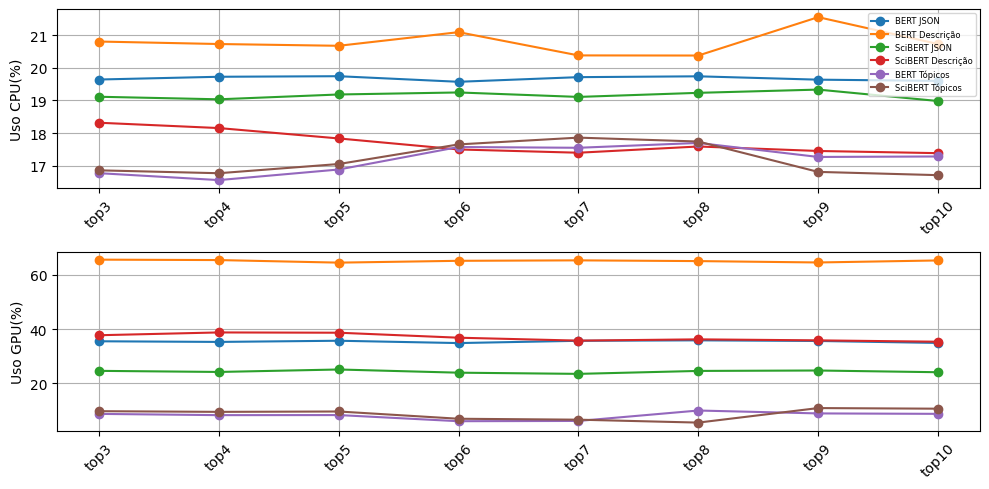

/tmp/ipykernel_2466/4128732576.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(top_labels, rotation=45)
/tmp/ipykernel_2466/4128732576.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(top_labels, rotation=45)


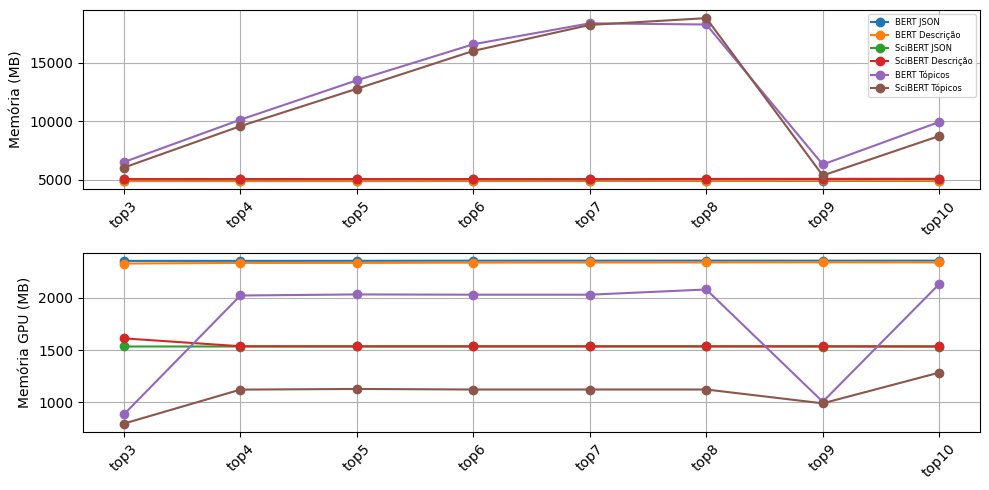

In [17]:
import matplotlib.pyplot as plt

data_dict = {
    'BERT JSON': mean_bert_json,
    'BERT Descrição': mean_bert_descricao,
    'SciBERT JSON': mean_scibert_json,
    'SciBERT Descrição': mean_scibert_descricao,
    'BERT Tópicos': mean_bert_topicos,
    'SciBERT Tópicos': mean_scibert_topicos
}

map_colum_x = {
    'CPU': 'Uso CPU(%)',
    'Memory': 'Memória (MB)',
    'GPU': 'Uso GPU(%)',
    'GPU_Memory': 'Memória GPU (MB)'
}

# Lista de colunas agrupadas
columns_group1 = ['CPU', 'GPU']
columns_group2 = ['Memory', 'GPU_Memory']

# Converter os índices para a forma "topX"
top_labels = ["top3", "top4", "top5", "top6", "top7", "top8", "top9", "top10"]

# Plotar os gráficos de uso de CPU e GPU
fig, ax = plt.subplots(2, 1, figsize=(10, 5))

for column in columns_group1:
    for key, data in data_dict.items():
        y_data = data[column] * 100 if column == 'GPU' else data[column]
        ax[0 if column == 'CPU' else 1].plot(top_labels, y_data, marker='o', label=key if column == 'CPU' else "")

ax[0].set_ylabel(map_colum_x['CPU'])
ax[0].grid(True)
ax[0].legend(loc='upper right', fontsize=6)
ax[0].set_xticklabels(top_labels, rotation=45)

ax[1].set_ylabel(map_colum_x['GPU'])
ax[1].grid(True)
ax[1].set_xticklabels(top_labels, rotation=45)

plt.tight_layout()
plt.show()

# Plotar os gráficos de uso de memória e memória GPU
fig, ax = plt.subplots(2, 1, figsize=(10, 5))

for column in columns_group2:
    for key, data in data_dict.items():
        y_data = data[column]
        ax[0 if column == 'Memory' else 1].plot(top_labels, y_data, marker='o', label=key if column == 'Memory' else "")

ax[0].set_ylabel(map_colum_x['Memory'])
ax[0].grid(True)
ax[0].legend(loc='upper right', fontsize=6)
ax[0].set_xticklabels(top_labels, rotation=45)

ax[1].set_ylabel(map_colum_x['GPU_Memory'])
ax[1].grid(True)
ax[1].set_xticklabels(top_labels, rotation=45)

plt.tight_layout()
plt.show()


In [65]:
def countTime(directory, modelo, metodo):

    pattern = re.compile(r'top\d+')

    diferencas_por_topx = {}

    for filename in os.listdir(directory):
        if metodo in filename:
            match = pattern.search(filename)
            if match:
                top_number = match.group(0)

                filepath = os.path.join(directory, filename)
                df = pd.read_csv(filepath)
                df['Timestamp'] = pd.to_datetime(df['Timestamp'])
                time_difference = (df['Timestamp'].iloc[-1] - df['Timestamp'].iloc[0]).total_seconds()

                if top_number in diferencas_por_topx:
                    diferencas_por_topx[top_number].append(time_difference)
                else:
                    diferencas_por_topx[top_number] = [time_difference]


    media_por_topx = {topx: sum(diferencas) / len(diferencas) for topx, diferencas in diferencas_por_topx.items()}


    order = ["top3", "top4", "top5", "top6", "top7", "top8", "top9", "top10"]
    media_por_topx_sorted = {k: media_por_topx[k] for k in order}

    topx = list(media_por_topx_sorted.keys())
    media_tempo = list(media_por_topx_sorted.values())

    dicionario_topx_media = dict(zip(topx, media_tempo))

    return(dicionario_topx_media)


def countTimeTopicos(directory, modelo, metodo):

    pattern = re.compile(r'hardware_top\d+')

    diferencas_por_topx = {}

    for filename in os.listdir(directory):
        if metodo in filename:
            match = pattern.search(filename)
            if match:
                pattern = re.compile(r'_(top\d+)')
                match = pattern.search(filename)
                top_number = match.group(1)

                filepath = os.path.join(directory, filename)
                df = pd.read_csv(filepath)
                df['Timestamp'] = pd.to_datetime(df['Timestamp'])
                time_difference = (df['Timestamp'].iloc[-1] - df['Timestamp'].iloc[0]).total_seconds()

                if top_number in diferencas_por_topx:
                    diferencas_por_topx[top_number].append(time_difference)
                else:
                    diferencas_por_topx[top_number] = [time_difference]


    media_por_topx = {topx: sum(diferencas) / len(diferencas) for topx, diferencas in diferencas_por_topx.items()}

    order = ["top3", "top4", "top5", "top6", "top7", "top8", "top9", "top10"]
    media_por_topx_sorted = {k: media_por_topx[k] for k in order}

    topx = list(media_por_topx_sorted.keys())
    media_tempo = list(media_por_topx_sorted.values())
    

    dicionario_topx_media = dict(zip(topx, media_tempo))

    return(dicionario_topx_media)

time_bert_json = countTime('hardware_info_bert','bert','json')
time_bert_descricao = countTime('hardware_info_bert','bert','descricao')
time_bert_topicos = countTimeTopicos('topicos/bert','bert','descricao')
time_scibert_json = countTime('hardware_info_scibert','scibert','json')
time_scibert_descricao = countTime('hardware_info_scibert','scibert','descricao')
time_scibert_topicos = countTimeTopicos('topicos/scibert','scibert','descricao')

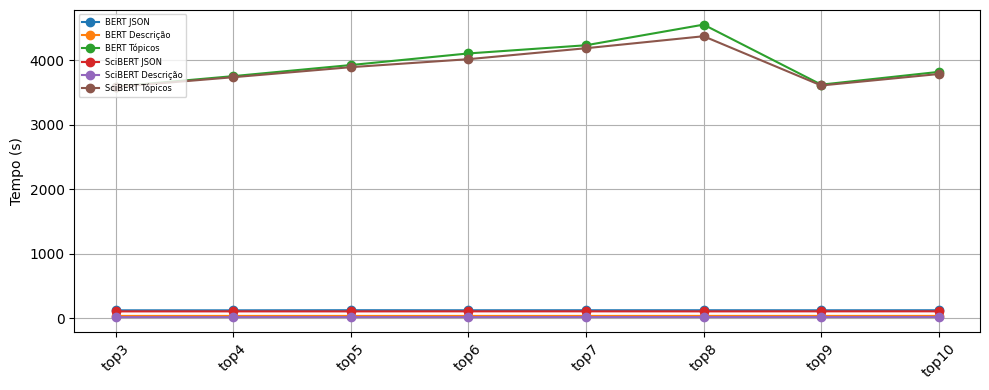

In [72]:
# Converter chaves do dicionário para lista de strings para rótulos do eixo x
top_labels = ['top3', 'top4', 'top5', 'top6', 'top7', 'top8', 'top9', 'top10']

# Plotar gráficos de linha para cada conjunto de dados
plt.figure(figsize=(10, 4))
plt.plot(top_labels, list(time_bert_json.values()), marker='o', label='BERT JSON')
plt.plot(top_labels, list(time_bert_descricao.values()), marker='o', label='BERT Descrição')
plt.plot(top_labels, list(time_bert_topicos.values()), marker='o', label='BERT Tópicos')
plt.plot(top_labels, list(time_scibert_json.values()), marker='o', label='SciBERT JSON')
plt.plot(top_labels, list(time_scibert_descricao.values()), marker='o', label='SciBERT Descrição')
plt.plot(top_labels, list(time_scibert_topicos.values()), marker='o', label='SciBERT Tópicos')

plt.ylabel('Tempo (s)')
# plt.xlabel('Top')
# plt.title('Média de Tempo por Top')
plt.legend(loc='upper left', fontsize='6')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()